# 3. Image import/export

For the moment, we have only used images that were provided internally by skimage. We are however normally going to use data located in the file system. The module skimage.io deals with all in/out operations and supports a variety of different import mechanisms.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

In [6]:
import course_functions
datapath = course_functions.define_data_path()

## 3.1 Simple case

Most of the time the simples command imread() will do the job. One has just to specifiy the path of the file or a url. In general your path is going to look something like:
```
image = io.imread('/Users/yourname/Desktop/MyData/Klee.jpg')
```
For the sake of simplicity in this course we automatically provide the location of the data in the datapath variable and just append the particular folder and file we are interested in:

In [7]:
file_path = datapath+'Data/Klee.jpg'
print(file_path)

../Data/Klee.jpg


Depending on your system, you might just see a relative path (starts with ../) indicating the files are one level higher than the current location. If you want to see the full path you can use the os module:

In [8]:
import os
print(os.path.realpath(file_path))

/Users/gw18g940/Google Drive/BernMIC/ImageProcessingLecture/Data/Klee.jpg


You can also use standard Unix commands from within Jupyter. Just start the line with the ! sign. Some functions don't even need that sign:

In [9]:
!ls

1-Introduction.ipynb       9-Watershed.ipynb
10-3D_case.ipynb           Env_setup
11-Complete_analysis.ipynb Exercises
12-Registration.ipynb      Index.ipynb
2-Numpy_images.ipynb       Intro_presentation.ipynb
3-Image_import.ipynb       MyData
4-Basics.ipynb             README.md
4b-Other_image_types.ipynb XX-PyImageJ.ipynb
5-Binary_operations.ipynb  __pycache__
6-Functions.ipynb          course_functions.py
7-Active_contours.ipynb    requirements.txt
8-Pattern_matching.ipynb


In [10]:
ls

1-Introduction.ipynb        9-Watershed.ipynb
10-3D_case.ipynb            Env_setup/
11-Complete_analysis.ipynb  Exercises/
12-Registration.ipynb       Index.ipynb
2-Numpy_images.ipynb        Intro_presentation.ipynb
3-Image_import.ipynb        MyData/
4-Basics.ipynb              README.md
4b-Other_image_types.ipynb  XX-PyImageJ.ipynb
5-Binary_operations.ipynb   __pycache__/
6-Functions.ipynb           course_functions.py
7-Active_contours.ipynb     requirements.txt
8-Pattern_matching.ipynb


In [11]:
pwd

'/Users/gw18g940/Google Drive/BernMIC/ImageProcessingLecture/Python_image_processing'

In [5]:
image = io.imread(file_path)

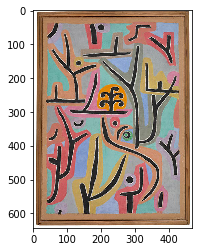

In [6]:
plt.imshow(image)
plt.show()

In [7]:
image = io.imread('https://upload.wikimedia.org/wikipedia/commons/0/09/FluorescentCells.jpg')

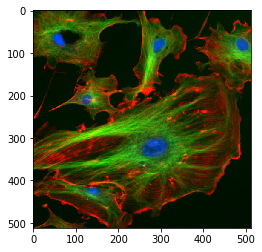

In [8]:
plt.imshow(image)
plt.show()

## 3.2 Series of images (.tif)

Simple format such as jpg are usually found more in human sciences which deals with photography pictures or scans of documents. The reason for that is that for those applications, in most situations one does not care about quantitative information and effects of information compression occurring in jpg are irrelevant. Also, those kind of data are rarely multi-dimensional (except for RGB).

In most other cases, the actual pixel intensity gives important information and one needs a format that preserves that information. Usually this is the .tif format or one of its many derivatives. One advantage is that the .tif format allows to save multiple images within a single file, a very useful feature for multi-dimensional acquisitions.

You might encounter different situations.

### 3.2.1 Series of separate images

In the first case, you would have multiple single .tif files within one folder. You might want to handle this situation in different ways.

If you need to analyze each image separately, you would first need to make a list of images of interest, and then open them one by one. Useful tools to do that are regular expressions provided by the default re package, and exploration of files and folder using the default os package

In [3]:
import re

Let us look at at microscopy dataset where single planes were acquired at multiple locations in two channels and are stored in individual files. The folder that contains the files is:

In [4]:
folder = datapath + 'Data/BBBC007_v1_images/A9'

Let's list all the files contained in the folder

In [9]:
files = os.listdir(folder)
print(files)

['A9 p10d.tif', 'A9 p10f.tif', 'A9 p7d.tif', 'A9 p7f.tif', 'A9 p9f.tif', 'A9 p5d.tif', 'A9 p5f.tif', 'A9 p9d.tif']


The two channels are defined by the last character before .tif. We can now define a regular expression that will only select the 'd' channel:

.*d.tif

which means any number of any characters (.*) followed by d.tif

Let's apply it to the first file name. findall() is going to find any strings that match the experession define above. If none is found it return an empty list.

In [10]:
re.findall('.*d.tif',files[0])

['A9 p10d.tif']

In [11]:
re.findall('.*q.tif',files[0])

[]

We now collect all the file names that match the expression using a comprehension list that goes through all file names:

In [12]:
matched = [re.findall('.*d.tif',x) for x in files]
print(matched)

[['A9 p10d.tif'], [], ['A9 p7d.tif'], [], [], ['A9 p5d.tif'], [], ['A9 p9d.tif']]


To only keep matches, we can add a condition in the comprehension list: keep only cases where the returned list is not empty:

In [13]:
final_list = [x[0] for x in matched if len(x)>0]
print(final_list)

['A9 p10d.tif', 'A9 p7d.tif', 'A9 p5d.tif', 'A9 p9d.tif']


Regular expressions are a very powerful tool and allow one to do much more than shown here. They are also implemented in a large number of programming languages so it's a good idea to familiarize yourself with them. Note that in simple cases like above, you can use a simpler parsing of the names using the glob module and the wildcard sing * (plus a few other signs):

In [15]:
import glob

Show all the content of the folder

In [20]:
glob.glob(folder+'/*')

['../Data/BBBC007_v1_images/A9/A9 p10d.tif',
 '../Data/BBBC007_v1_images/A9/A9 p10f.tif',
 '../Data/BBBC007_v1_images/A9/A9 p7d.tif',
 '../Data/BBBC007_v1_images/A9/A9 p7f.tif',
 '../Data/BBBC007_v1_images/A9/A9 p9f.tif',
 '../Data/BBBC007_v1_images/A9/A9 p5d.tif',
 '../Data/BBBC007_v1_images/A9/A9 p5f.tif',
 '../Data/BBBC007_v1_images/A9/A9 p9d.tif']

Show only the "d" files:

In [21]:
glob.glob(folder+'/*d.tif')

['../Data/BBBC007_v1_images/A9/A9 p10d.tif',
 '../Data/BBBC007_v1_images/A9/A9 p7d.tif',
 '../Data/BBBC007_v1_images/A9/A9 p5d.tif',
 '../Data/BBBC007_v1_images/A9/A9 p9d.tif']

Now that we have a list, we can go through it, open each image, and for example store it in a list. We have however to do one last thing, namely reconstructing the right image path. This can be done easily in Python by concatenating strings with a + sign:

In [18]:
folder + '/' + final_list[0]

'../Data/BBBC007_v1_images/A9/A9 p10d.tif'

In [19]:
channel1_list = []
for x in final_list:
    temp_im = io.imread(folder+'/'+x)
    channel1_list.append(temp_im)

Let's see what we have in that list of images by plotting them:

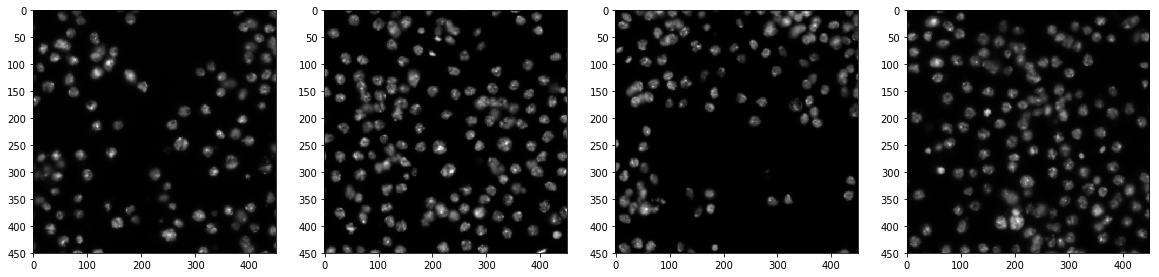

In [20]:
num_plots = len(channel1_list)
plt.figure(figsize=(20,30))
for i in range(num_plots):
    plt.subplot(1,num_plots,i+1)
    plt.imshow(channel1_list[i],cmap = 'gray')
plt.show()

Of course you don't have to load and store all images at once. You could just open one, process it, open the next one etc.

### 3.2.2 Multi-dimensional stacks

We now look at a more complex multi-dimensional case taken from a public dataset (J Cell Biol. 2010 Jan 11;188(1):49-68) that can be found [here](http://flagella.crbs.ucsd.edu/images/30567).

We already provide it in the datafolder:

In [13]:
file = datapath+'Data/30567/30567.tif'

In [14]:
image = io.imread(file)

The dataset is a time-lapse 3D confocal microscopy acquired in two channels, one showing the location of tubulin, the other of lamin (cell nuclei).

All .tif variants have the same basic structure: single image planes are stored in individual "sub-directories" within the file. Some meta information is stored with each plane, some is stored for the entire file. However, how the different dimensions are ordered within the file (e.g. all time-points of a given channel first, or alternatively all channels of a given time-point) can vary wildly. The simplest solution is therefore usually to just import the file, look at the size of various dimensions and plot a few images to figure out how the data are organized.

In [29]:
image.shape

(72, 2, 5, 512, 672)

We know we have two channels (dimension 2), and five planes (dimension 3). Usually the large numbers are the image dimension, and therefore 72 is probably the number of time-points. If we look at the first time point, of both channels, of the first plane, we indeed get an appropriate result:

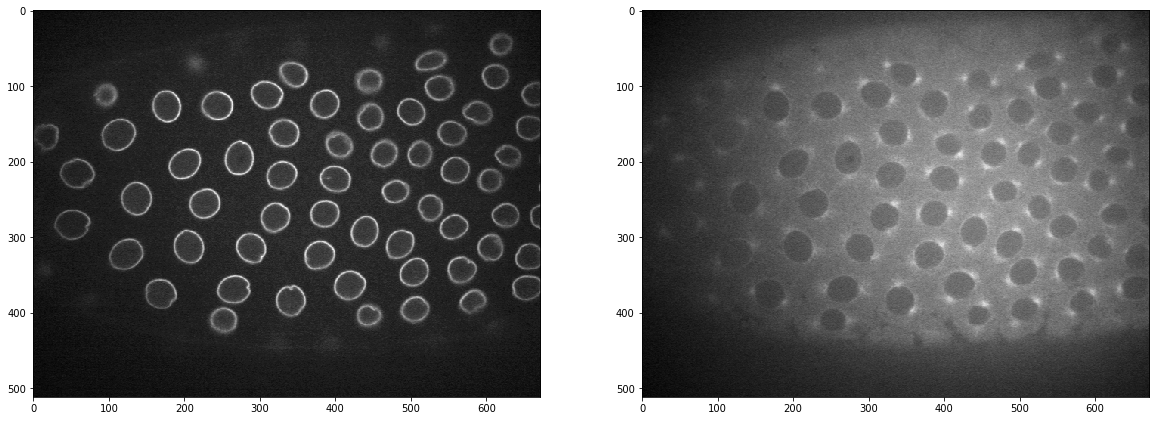

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image[0,0,0,:,:],cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(image[0,1,0,:,:],cmap = 'gray')
plt.show()

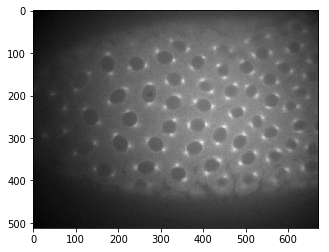

In [31]:
plt.imshow(np.sum(image[0,1,:,:,:],axis = 0),cmap = 'gray')
plt.show()

skimage allows one to use specific import plug-ins for various applications (e.g. gdal for geographic data, FITS for astronomy etc.).

In particular it offers a lower-lever access to tif files through the tifffile module. This allows one for example to import only a subset of planes from the dataset if the latter is large.

In [32]:
from skimage.external.tifffile import TiffFile

data = TiffFile(file)

Now the file is open but not imported, and one can query information about it. For example some metadata:

In [33]:
data.info()

'TIFF file: 30567.tif, 473 MiB, big endian, ome, 720 pages\n\nSeries 0: 72x2x5x512x672, uint16, TCZYX, 720 pages, not mem-mappable\n\nPage 0: 512x672, uint16, 16 bit, minisblack, raw, ome|contiguous\n* 256 image_width (1H) 672\n* 257 image_length (1H) 512\n* 258 bits_per_sample (1H) 16\n* 259 compression (1H) 1\n* 262 photometric (1H) 1\n* 270 image_description (3320s) b\'<?xml version="1.0" encoding="UTF-8"?><!-- Wa\n* 273 strip_offsets (86I) (182, 8246, 16310, 24374, 32438, 40502, 48566, 56630,\n* 277 samples_per_pixel (1H) 1\n* 278 rows_per_strip (1H) 6\n* 279 strip_byte_counts (86I) (8064, 8064, 8064, 8064, 8064, 8064, 8064, 8064, \n* 282 x_resolution (2I) (1, 1)\n* 283 y_resolution (2I) (1, 1)\n* 296 resolution_unit (1H) 1\n* 305 software (17s) b\'LOCI Bio-Formats\''

Some specific planes:

In [34]:
image = [data.pages[x].asarray() for x in range(3)]

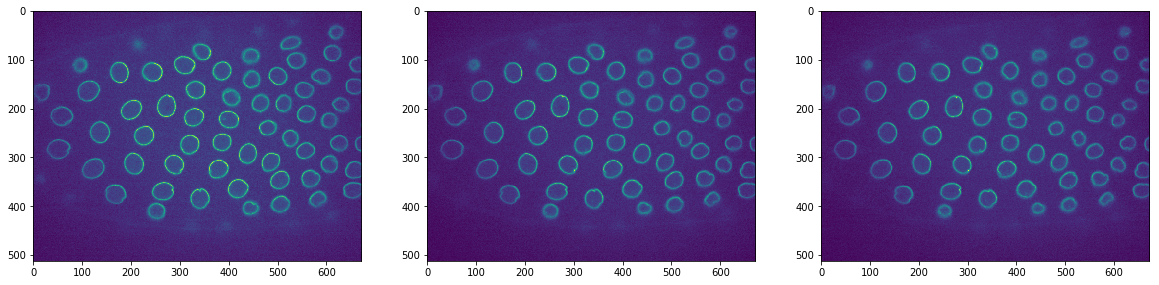

In [35]:
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(image[i])
plt.show()

### 3.2.3 Alternative formats

While a large majority of image formats is somehow based on tif, instrument providers often make their own tif version by creating a proprietary format. This is for example the case of the Zeiss microscopes which create the .czi format.

In almost all cases, you can find an dedicated library that allows you to open your particular file. For example for czi, there is a specific [package](https://pypi.org/project/czifile/).

More generally your research field might use some particular format. For example Geospatial data use the format GDAL, and for that there is of course a dedicated [package](https://pypi.org/project/GDAL/).

**Note that a lot of biology formats are well handled by the tifffile package. io.imread() tries to use the best plugin to open a format, but sometimes if fails. If you get an error using the default io.imread() you can try to specific what plugin should open the image, *.e.g***

In [15]:
image = io.imread(file, plugin='tifffile')

## 3.3 Exporting images

There are two ways to save images. Either as plain matrices, which can be written and re-loaded very fast, or as actual images.

Just like for loading, saving single planes is easy. Let us save a small region of one of the images above:

In [36]:
io.imsave('MyData/region.tif',image[0][200:300,200:300])
io.imsave('MyData/region.jpg',image[0][200:300,200:300])

/Users/gw18g940/miniconda3/envs/teaching_test/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from uint16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [37]:
reload_im = io.imread('MyData/region.jpg')

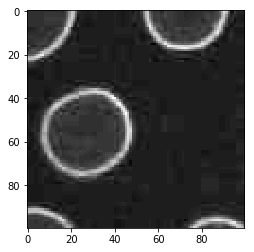

In [38]:
plt.imshow(reload_im,cmap='gray')
plt.show()

Saving multi-dimensional .tif files is a bit more complicated as one has of course to be careful with the dimension order. Here again the tifffile module allows to achieve that task. We won't go through the details, but here's an example of how to save a dataset with two time poins, 5 stacks, 3 channels into a file that can then be opened as a hyper-stack in Fiji:

In [39]:
from skimage.external.tifffile import TiffWriter

data = np.random.rand(2, 5, 3, 301, 219)#generate random images
data = (data*100).astype(np.uint8)#transform data in a reasonable 8bit range

with TiffWriter('MyData/multiD_set.tif', bigtiff=False, imagej=True) as tif:
    for i in range(data.shape[0]):
        tif.save(data[i])

## 3.4 Interactive plotting

Jupyter offers a solution to interact with various types of plots: ipywidget

In [3]:
from ipywidgets import interact, IntSlider

The interact() function takes as input a function and a value for that function. That function should plot or print some information. interact() then creates a widget, typically a slider, executes the plotting function and adjusts the ouptut when the slider is moving. For example:

In [4]:
def square(num=1):
    print(str(num)+' squared is: '+str(num*num))
interact(square, num=(0,20,1));

interactive(children=(IntSlider(value=1, description='num', max=20), Output()), _dom_classes=('widget-interact…

Depending on the values passed as arugments, interact() will create different widgets. E.g. with text:

In [53]:
def f(x): 
    return x
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

An important note for our imaging topic: when moving the slider, the function is continuously updated. If the function does some computationally intensitve work, this might just overload the system. To avoid that, one can explicitly specifiy the slider type and its specificities:

In [61]:
def square(num=1):
    print(str(num)+' squared is: '+str(num*num))
interact(square, num = IntSlider(min=-10,max=30,step=1,value=10,continuous_update = False));

interactive(children=(IntSlider(value=10, continuous_update=False, description='num', max=30, min=-10), Output…

If we want to scroll through our image stack we can do just that. Let's first define a function that will plot the first plane of the channel 1 at all time points:

In [73]:
image = io.imread(file)

In [74]:
def plot_plane(t):
    plt.imshow(image[t,0,0,:,:])
    plt.show()

In [77]:
interact(plot_plane, t = IntSlider(min=0,max=71,step=1,value=0,continuous_update = True));

interactive(children=(IntSlider(value=0, description='t', max=71), Output()), _dom_classes=('widget-interact',…

Of course we can do that for multiple dimensions:

In [78]:
def plot_plane(t,c,z):
    plt.imshow(image[t,c,z,:,:])
    plt.show()

interact(plot_plane, t = IntSlider(min=0,max=71,step=1,value=0,continuous_update = True),
         c = IntSlider(min=0,max=1,step=1,value=0,continuous_update = True),
         z = IntSlider(min=0,max=4,step=1,value=0,continuous_update = True));

interactive(children=(IntSlider(value=0, description='t', max=71), IntSlider(value=0, description='c', max=1),…

And we can make it as fancy as we want:

In [79]:
def plot_plane(t,c,z):
    if c == 0:
        plt.imshow(image[t,c,z,:,:], cmap = 'Reds')
    else:
        plt.imshow(image[t,c,z,:,:], cmap = 'Blues')
    plt.show()

interact(plot_plane, t = IntSlider(min=0,max=71,step=1,value=0,continuous_update = True),
         c = IntSlider(min=0,max=1,step=1,value=0,continuous_update = True),
         z = IntSlider(min=0,max=4,step=1,value=0,continuous_update = True));

interactive(children=(IntSlider(value=0, description='t', max=71), IntSlider(value=0, description='c', max=1),…